In [1]:
from autoencoder import *

In [4]:
model, _ = model_loader("create")
model = model.to(DEVICE)
model.eval()

Creating a new model


ClagnoscoAutoencoder(
  (encoder): ClagnoscoEncoder(
    (conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
      (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01, inplace=True)
      (6): Conv2d(128, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (pool): AdaptiveAvgPool2d(output_size=(2, 2))
    (lin): Sequential(
      (0): Linear(in_features=4096, out_features=1024, bias=True)
    )
  )
  (decoder): ClagnoscoDecoder(
    (lin): Sequential(
      (0): Linear(in_features=1025, 

In [4]:
# restored_img to tensor and print it (not shape and not instance of Image)

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(restored_img)  # [1, 3, H, W]
img_tensor

tensor([[[0.4941, 0.4980, 0.4902,  ..., 0.4980, 0.4902, 0.4980],
         [0.5020, 0.4824, 0.5020,  ..., 0.4824, 0.5020, 0.4941],
         [0.4902, 0.4980, 0.4863,  ..., 0.4941, 0.4863, 0.4980],
         ...,
         [0.5020, 0.4824, 0.5020,  ..., 0.4824, 0.5020, 0.4941],
         [0.4902, 0.4941, 0.4863,  ..., 0.4941, 0.4863, 0.4980],
         [0.4980, 0.4902, 0.4941,  ..., 0.4902, 0.4941, 0.4941]],

        [[0.5137, 0.5216, 0.5137,  ..., 0.5216, 0.5137, 0.5216],
         [0.5176, 0.5176, 0.5216,  ..., 0.5216, 0.5216, 0.5176],
         [0.5176, 0.5216, 0.5137,  ..., 0.5216, 0.5137, 0.5216],
         ...,
         [0.5176, 0.5176, 0.5216,  ..., 0.5216, 0.5216, 0.5176],
         [0.5176, 0.5216, 0.5137,  ..., 0.5216, 0.5137, 0.5216],
         [0.5176, 0.5176, 0.5216,  ..., 0.5176, 0.5216, 0.5216]],

        [[0.5216, 0.5255, 0.5216,  ..., 0.5255, 0.5216, 0.5216],
         [0.5255, 0.5255, 0.5255,  ..., 0.5255, 0.5255, 0.5255],
         [0.5255, 0.5255, 0.5176,  ..., 0.5255, 0.5176, 0.

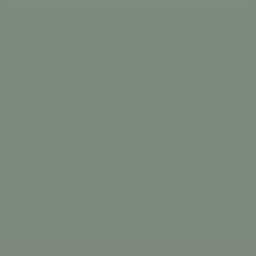

In [5]:
img = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/2-Finnic-branch.png/190px-2-Finnic-branch.png"
img = r"C:\!project-dataset\images\000d10f3c1c08fc3bf7a68322cab7b7f.jpg"
# img = r"C:\!project-dataset\images\00a50fad781d7e2edc57b3780be70e7f.jpg"

# latent_vec, embedding_vec, restored_img = run_image_through_autoencoder(model, img)
latent_vec, restored_img = run_image_through_autoencoder(model, img)

restored_img

In [9]:
Image.open(img).convert("RGB")

OSError: [Errno 22] Invalid argument: 'F:\\!Институт МУИВ\\4 курс\\Clagnosco\\https:\\upload.wikimedia.org\\wikipedia\\commons\\thumb\\e\\e9\\2-Finnic-branch.png\\190px-2-Finnic-branch.png'

In [10]:
latent_vec

tensor([ 2.1182e-02, -2.1091e-04, -2.1828e-02, -2.3730e-02,  3.8498e-03,
         6.6156e-03,  3.1831e-02,  2.7492e-02, -1.8803e-02,  1.1190e-02,
        -2.4893e-02,  1.5899e-02, -3.6432e-02, -1.3938e-02, -9.6515e-03,
        -1.3330e-02, -1.0423e-03,  2.2420e-02,  6.8059e-03,  3.1098e-03,
        -1.8693e-03, -3.5390e-03,  2.8928e-03,  1.9845e-02, -1.0900e-02,
         2.8584e-02, -2.1986e-02,  2.0177e-04, -2.0371e-02, -2.1418e-02,
         2.4582e-02, -1.6465e-02,  2.3433e-02, -2.3747e-02, -1.8593e-02,
         2.0134e-02, -5.6404e-03, -2.8261e-02,  1.6308e-02,  2.1581e-02,
        -9.0314e-03, -2.3977e-02,  1.8067e-02, -4.9290e-03,  9.0745e-03,
        -1.3482e-02, -5.7760e-03,  1.3305e-02,  6.4598e-03,  2.7797e-02,
        -1.5360e-02,  4.6247e-03,  7.6798e-03,  3.7087e-02,  5.8561e-03,
        -1.6156e-02,  9.8115e-03,  1.0664e-02, -6.5846e-03, -3.1575e-02,
         3.9802e-03,  1.4432e-02, -3.0425e-02, -1.0872e-02, -3.2138e-03,
         1.8657e-03, -9.2664e-03,  5.5425e-03, -4.9

In [6]:
delete_untrained_loss_log_files()

Deleted untrained log loss file: models/autoencoder_2025-05-08_03-23-28_epoch_3_loss.txt
Deleted untrained log loss file: models/autoencoder_2025-05-08_04-00-40_epoch_3_loss.txt
Deleted untrained log loss file: models/autoencoder_2025-05-08_12-57-57_epoch_13_loss.txt
Deleted untrained log loss file: models/autoencoder_2025-05-08_13-05-00_epoch_1_loss.txt
Deleted untrained log loss file: models/autoencoder_2025-05-08_14-06-55_epoch_14_loss.txt
Deleted untrained log loss file: models/autoencoder_2025-05-08_14-07-20_epoch_14_loss.txt
Deleted untrained log loss file: models/autoencoder_2025-05-08_14-56-38_epoch_15_loss.txt
Deleted untrained log loss file: models/autoencoder_2025-05-08_15-16-01_epoch_1_loss.txt
